## Script For Downloading Stock quotes 


2002-11-2 33.68
2003-04-2 32.42
2003-09-1 50.00
2004-02-1 87.00
3752
--- 2.2756669521331787 seconds ---


ValueError: setting an array element with a sequence.

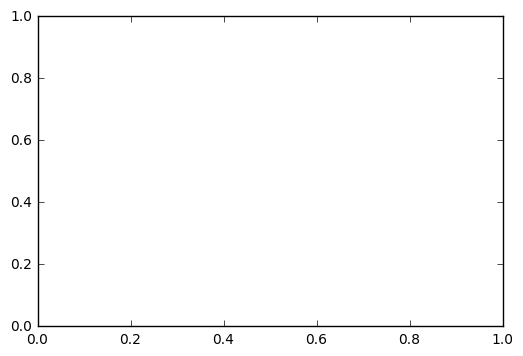

In [35]:
import matplotlib.pyplot as plt
from urllib import request
import datetime as DT
from matplotlib.dates import date2num
import time
start_time = time.time()
%matplotlib inline  


url = "http://real-chart.finance.yahoo.com/table.csv?s=LT.NS&a=06&b=1&c=2002&d=11&e=30&f=2016&g=d&ignore=.csv"


def download(url1):
    response = request.urlopen(url1)
    data = response.read()
    data_str = str(data)
    lines = data_str.split("\\n")
    lines = lines[1:-2]
    file = r"TCS.csv"
    fx = open(file,'w')
    n = 0
    datee = []
    index = []
    data = []
    for line in lines:
       # print(line)
        ftr = line[0:10]
        #print(ftr, "before")
        #ftr.replace("-0", "-1")
       # print(ftr, "after")
        datee.append(line[0:9])
       # print(datee,"here")
        index.append(line[11:16])
        fx.write(line + "\n")
        n += 1
        data = [(DT.datetime.strptime(*(ftr, "%Y-%m-%d")[0:100]), index)]


    fr = open('TCS.csv', 'r')
    txt = fr.read()
   # print(txt)
    fr.close()
    datee = datee[::-101]
    datee = datee[1:5]
    index = index[::-101]
    index = index[1:5]
    for x,y in zip(datee,index):
         data.append([DT.datetime.strptime(x, "%Y-%m-%d"), y])
         print(x,y)
    print(n)
    fx.close()
    print("--- %s seconds ---" % (time.time() - start_time))


    x = [date2num(date) for (date, value) in data]
    y = [value for (date, value) in data]

    fig = plt.figure()

    graph = fig.add_subplot(111)

    # Plot the data as a red line with round markers
    graph.plot(x,y,'r-o')

    # Set the xtick locations to correspond to just the dates you entered.
    graph.set_xticks(x)

    # Set the xtick labels to correspond to just the dates you entered.
    graph.set_xticklabels(
            [date.strftime("%Y-%m-%d") for (date, value) in data]
            )

    plt.show()
    
download(url)
